In [11]:
with open("hemo.fasta", "r") as file:
    print(file.read())

>NP_000549.1 hemoglobin subunit alpha [Homo sapiens]
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNA
VAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSK
YR
>ABG47031.1 hemoglobin, partial [Homo sapiens]
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLG
AFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFR
>NP_000508.1 hemoglobin subunit alpha [Homo sapiens]
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNA
VAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSK
YR




In [2]:
from collections import defaultdict
import numpy as np

# Given insulin sequences
sequences = {
    "QMS45326.1": "MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQGSLQPLAL",
    "QMS45324.1": "MGSETIKPAGAQQPSALQDRLHQKRPSSRSVPRAFASDHCPSAMALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYVCGERGFFYTPKTREAEDLQVGQVELGGGPGAGSLQP",
    "QMS45323.1": "MGSETIKPAGAQQPSALQDRLHQKRPSSRSLSFCHGPVDAPPAPAGAAGPLGT"
}

# Define the 5-mer (Change if needed)
selected_5mer = "GERGF"

# Step 1: Find occurrences of the 5-mer in sequences
occurrences = defaultdict(list)
for seq_id, seq in sequences.items():
    for i in range(len(seq) - len(selected_5mer) + 1):
        if seq[i:i+len(selected_5mer)] == selected_5mer:
            occurrences[seq_id].append(i)

# Step 2: Construct PWM
pwm_matrix = np.zeros((len(selected_5mer), 20))  # 20 amino acids
amino_acids = "ACDEFGHIKLMNPQRSTVWY"  # Standard 20 amino acids

# Frequency count
position_counts = [defaultdict(int) for _ in range(len(selected_5mer))]
total_occurrences = 0
for seq_id, indices in occurrences.items():
    for pos in indices:
        total_occurrences += 1
        for i, aa in enumerate(selected_5mer):
            position_counts[i][aa] += 1

# Convert to probabilities
for i in range(len(selected_5mer)):
    for j, aa in enumerate(amino_acids):
        pwm_matrix[i, j] = position_counts[i].get(aa, 0) / (total_occurrences if total_occurrences > 0 else 1)

# Step 3: Construct Z(ij) Matrix
z_matrix = {seq_id: [0] * len(seq) for seq_id, seq in sequences.items()}
for seq_id, indices in occurrences.items():
    for pos in indices:
        z_matrix[seq_id][pos] = 1  # Marking occurrence

# Display results
print("\nPWM Matrix:")
print(pwm_matrix)
print("\nZ(ij) Matrix (1 indicates the 5-mer is found at that position):")
for seq_id, z_values in z_matrix.items():
    print(seq_id, z_values)


PWM Matrix:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Z(ij) Matrix (1 indicates the 5-mer is found at that position):
QMS45326.1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
QMS45324.1 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
QMS45323.1 [

Frequent k-mers in clumps: set()


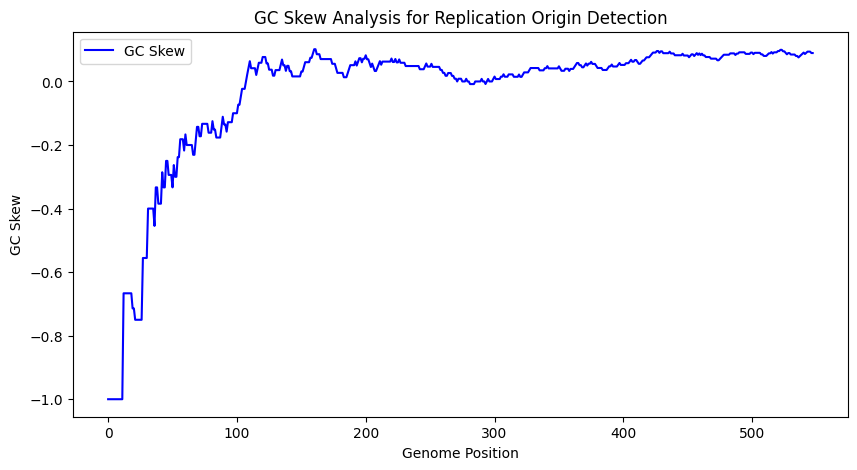

In [10]:
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np

def load_fasta(filename):
    """Load genome sequence from a FASTA file."""
    record = SeqIO.read(filename, "fasta")
    return str(record.seq)

def find_clumps(genome, k, L, t):
    """Find k-mers forming clumps in a genome."""
    clumps = set()
    for i in range(len(genome) - L + 1):
        window = genome[i:i + L]
        kmers = {}
        for j in range(len(window) - k + 1):
            kmer = window[j:j + k]
            kmers[kmer] = kmers.get(kmer, 0) + 1
        for kmer, count in kmers.items():
            if count >= t:
                clumps.add(kmer)
    return clumps

def compute_gc_skew(genome):
    """Compute the GC skew for the genome."""
    g_count, c_count = 0, 0
    gc_skew = []
    for base in genome:
        if base == 'G':
            g_count += 1
        elif base == 'C':
            c_count += 1
        gc_skew.append((g_count - c_count) / (g_count + c_count + 1e-6))
    return gc_skew

def plot_gc_skew(gc_skew):
    """Plot the GC skew to identify the replication origin."""
    plt.figure(figsize=(10,5))
    plt.plot(gc_skew, color='blue', label='GC Skew')
    plt.xlabel("Genome Position")
    plt.ylabel("GC Skew")
    plt.title("GC Skew Analysis for Replication Origin Detection")
    plt.legend()
    plt.show()

# Example usage:
filename = "prateek.fasta"  # Replace with actual file

genome_seq = load_fasta(filename)
k, L, t = 9, 500, 3  # Example parameters for clump finding
clumps = find_clumps(genome_seq, k, L, t)
print("Frequent k-mers in clumps:", clumps)

gc_skew = compute_gc_skew(genome_seq)
plot_gc_skew(gc_skew)
